In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [273]:
df = pd.read_csv('Mall_Customers.csv')
df.drop(['CustomerID', 'Genre', 'Age'], axis = 1, inplace = True)
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [274]:
X = df.values
X.shape

(200, 2)

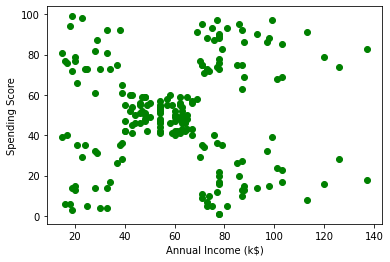

In [275]:
plt.plot(X[:, 0], X[:, 1], 'go')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [276]:
def close_cent(X, centroids):
    K = len(centroids)
    m = X.shape[0]
    n = X.shape[1]
    index = np.zeros((m, 1))
    for i in range(m):
        min_dist = int(1e9)
        for j in range(K):
            mat = X[i, :].reshape((1, n)) - centroids[j, :].reshape((1, n))
            dist =  mat @ mat.T
            if min_dist > dist:
                min_dist = dist
                index[i] = j
    return index

In [277]:
def update(K, index, X):
    n = X.shape[1]
    centroids = np.zeros((K, n))
    for i in range(K):
        centroids[i] = X[np.where(index == i), :][0].mean(axis = 0)
    return centroids

In [278]:
def initialize(K, X, n):
    m = X.shape[0]
    cent = np.zeros((K, n))
    for i in range(K):
        ran = np.random.randint(0, m-1)
        cent[i] = X[ran] 
    return cent

In [303]:
def cost(X, index, centroids):
    m = X.shape[0]
    n = X.shape[1]
    costt = 0
    for i in range(m):
        mat = X[i, :].reshape((1, n)) - centroids[index[i].astype('int'), :].reshape((1, n))
        costt += mat @ mat.T
    costt /= m
    return float(costt)

In [315]:
max_iter = 100
K = 9
n = X.shape[1]
m = X.shape[0]

In [309]:
costt = []
for k in range(1, K+1):
    centroids = initialize(k, X, n)
    for i in range(max_iter):
        index = close_cent(X, centroids)
        centroids = update(k, index, X)
    costt.append(cost(X, index, centroids))

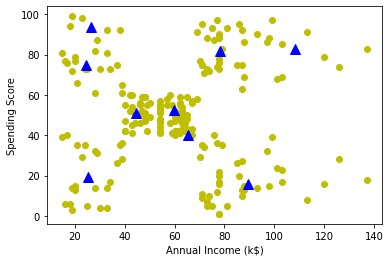

In [310]:
plt.plot(X[:, 0], X[:, 1], 'yo')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.plot(centroids[:, 0], centroids[:, 1], 'b^', markersize = 10)
plt.show()

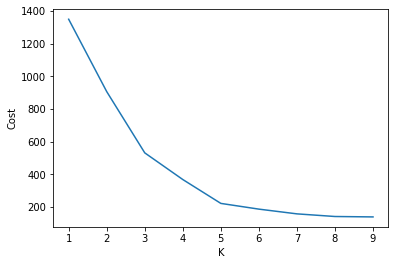

In [313]:
x = np.arange(1, 10, 1)
plt.plot(x, costt)
plt.xlabel('K')
plt.ylabel('Cost')
plt.show()

In [320]:
# Thus K = 5 is the best cluster group
centroids = initialize(5, X, n)
for i in range(max_iter):
    index = close_cent(X, centroids)
    centroids = update(5, index, X)

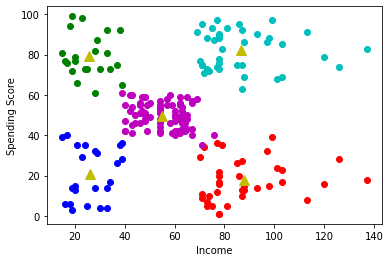

In [321]:
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    x = X[np.where(index == i), :][0][:, 0]
    y = X[np.where(index == i), :][0][:, 1]
    plt.plot(x, y, 'o', color = colors[i])
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.plot(centroids[:, 0], centroids[:, 1], 'y^', markersize = 10)
plt.show()